<a href="https://colab.research.google.com/github/LizaBartalevich/age_gender_ethncity/blob/main/age_gender_ethncity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!git clone https://github.com/LizaBartalevich/age_gender_ethncity


Cloning into 'age_gender_ethncity'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 72.09 KiB | 1.13 MiB/s, done.


1. Сбор и подготовка данных: Необходимо собрать большой набор фотографий людей разного пола, возраста и этнической принадлежности. Каждая фотография должна быть помечена соответствующими метками, указывающими пол, возраст и этническую принадлежность человека на фотографии. ✅

2. Выбор архитектуры нейронной сети - сверточная нейронная сеть (**CNN**) ✅

3. Предварительная обработка данных: Фотографии требуют предварительной обработки, включающей изменение размера, нормализацию, обрезку и устранение шума, чтобы гарантировать однородность и качество данных. ✅

4. Данные должны быть разделены на обучающий набор и тестовый набор.✅

5. Обучение нейросети: Используя обучающий набор данных, нейросеть должна быть обучена находить связи между входными изображениями и соответствующими метками пола, возраста и этнической принадлежности. Обучение может проводиться путем минимизации функции потерь с помощью методов оптимизации, таких как **стохастический градиентный спуск** или его вариации.

6. Оценка и тестирование нейросети: После завершения обучения нейросети необходимо оценить ее производительность на тестовом наборе данных. Метрики, такие как точность (accuracy), полнота (recall) и точность (precision), могут быть использованы для измерения эффективности классификации пола, возраста и этнической принадлежности.

7. Тонкая настройка и улучшение производительности: Если производительность нейросети не удовлетворяет требованиям, можно провести тонкую настройку гиперпараметров модели, изменить архитектуру или внести изменения в процесс обработки данных, чтобы улучшить результаты.

8. Развертывание и использование: После достижения удовлетворительной производительности нейросети можно развернуть ее в продукционную среду. Это может включать интеграцию с другими системами или создание веб-приложения, которое позволяет пользователям загружать фотографии и получать предсказания о поле, возрасте и этнической принадлежности.

9. Непрерывное обучение и совершенствование: Чтобы сохранить производительность нейросети на актуальном уровне, можно регулярно обновлять ее с использованием новых данных и методов обучения. Это поможет улучшить точность и расширить спектр определяемых признаков.


In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
from tqdm import tqdm
import random
import math 
import scipy.special
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, LeakyReLU


In [ ]:
#хз как тут нормально файл держать
from google.colab import drive
drive.mount('/content/drive')
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age_gender/age_gender.csv')
dataframe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


Text(0.5, 1.0, 'Gender')

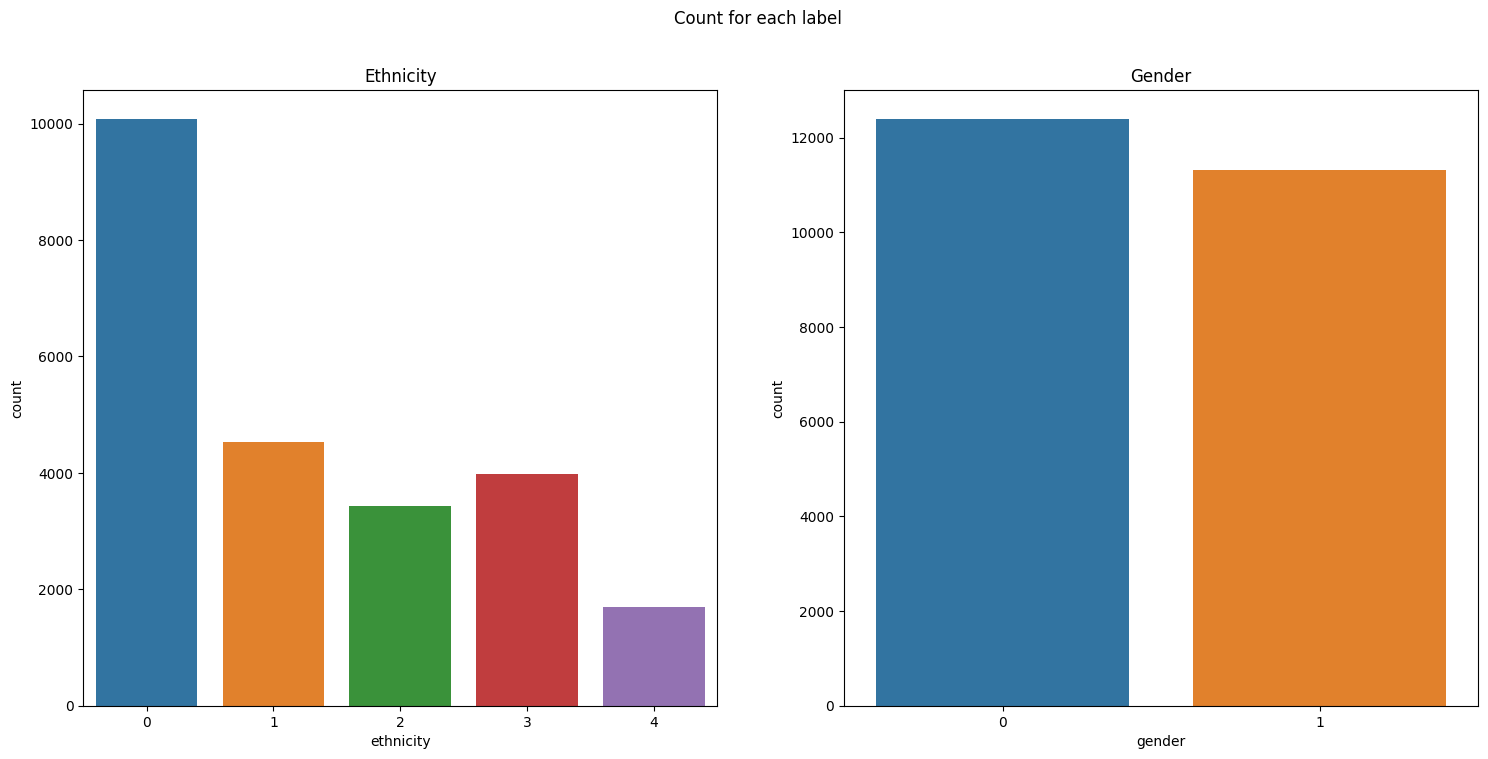

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle("Count for each label")

sns.countplot(ax = axes[0], x = dataframe.ethnicity)
axes[0].set_title("Ethnicity")

sns.countplot(ax = axes[1], x = dataframe.gender)
axes[1].set_title("Gender")

<Axes: xlabel='age', ylabel='Count'>

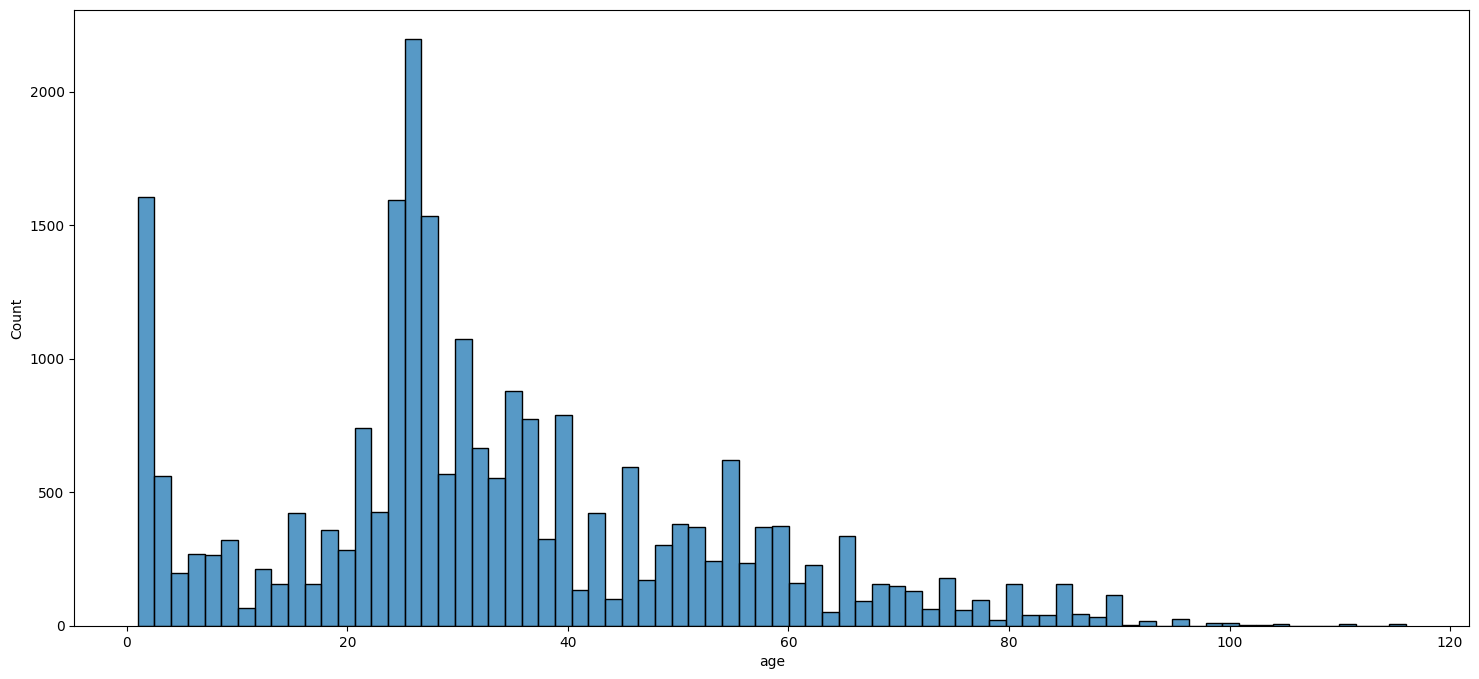

In [ ]:
plt.figure(figsize=(18,8))
sns.histplot(dataframe.age)

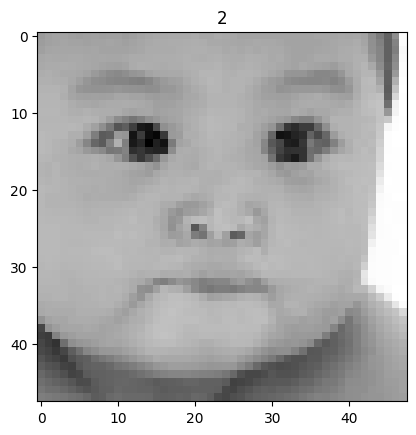

In [ ]:
#пример фотки
index = 14
image = np.fromstring(dataframe['pixels'][index], sep = ' ', dtype = np.uint8).reshape((48,48))
plt.title(dataframe['ethnicity'][index])
plt.imshow(image, cmap ="gray")

In [ ]:
def pixel_reshape(column):
    column = np.array([x for x in column.str.split()], dtype ="float32")
    column = np.reshape(column, (-1,48,48,1))
    return np.array(column)

In [ ]:
# нормализация и изменение размера(пункт 3)
X = (pixel_reshape(dataframe['pixels']))/255
y = dataframe[['age', 'ethnicity', 'gender']]

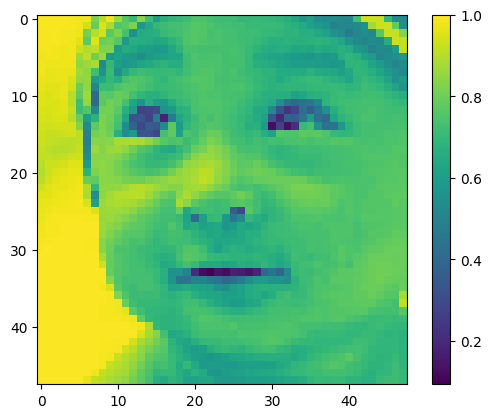

In [ ]:
plt.figure()
plt.imshow(X[11])
plt.colorbar()
plt.grid(False)

In [ ]:
# делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train_age, y_test_age = y_train['age'], y_test['age']
y_train_ethnicity, y_test_ethnicity = y_train['ethnicity'], y_test['ethnicity']
y_train_gender, y_test_gender = y_train['gender'], y_test['gender']


In [ ]:
X_train.shape, y_train_age.shape

((18964, 48, 48, 1), (18964,))

In [ ]:
# создание модели для определения пола
model_gender = tf.keras.Sequential([
    Conv2D(16, padding="same", kernel_size=(2, 2), input_shape=((48,48,1))),
    MaxPool2D((2, 2)),
    Conv2D(32, kernel_size=(3, 3), padding="same"),
    Flatten(),
    Dense(64, activation=LeakyReLU(alpha=0.3)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
#компиляция модели
model_gender.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", loss_weights = 0.5, metrics=["accuracy"])

In [ ]:
model_gender.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 16)        80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1179712   
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                      

In [ ]:
model_gender.fit(X_train, y_train_gender, epochs=13)

Epoch 1/13
593/593 [==============================] - 53s 87ms/step - loss: 0.2155 - accuracy: 0.8083
Epoch 2/13
593/593 [==============================] - 44s 74ms/step - loss: 0.1798 - accuracy: 0.8436
Epoch 3/13
593/593 [==============================] - 46s 78ms/step - loss: 0.1693 - accuracy: 0.8559
Epoch 4/13
593/593 [==============================] - 46s 77ms/step - loss: 0.1637 - accuracy: 0.8611
Epoch 5/13
593/593 [==============================] - 45s 75ms/step - loss: 0.1583 - accuracy: 0.8654
Epoch 6/13
593/593 [==============================] - 45s 76ms/step - loss: 0.1550 - accuracy: 0.8685
Epoch 7/13
593/593 [==============================] - 44s 75ms/step - loss: 0.1533 - accuracy: 0.8712
Epoch 8/13
593/593 [==============================] - 44s 74ms/step - loss: 0.1485 - accuracy: 0.8749
Epoch 9/13
593/593 [==============================] - 45s 76ms/step - loss: 0.1466 - accuracy: 0.8765
Epoch 10/13
593/593 [==============================] - 45s 77ms/step - loss: 0.141

In [ ]:
model_gender.evaluate(X_test, y_test_gender)

149/149 [==============================] - 4s 24ms/step - loss: 1.6480 - accuracy: 0.5254


[1.6479588747024536, 0.5254165530204773]

In [ ]:
preds = model_gender.predict(X_test)

for i in range(20):
    print(f"True gender: {y_test_gender.iloc[i]} vs Predicted gender: {int(np.rint(preds[i]))}")

149/149 [==============================] - 3s 19ms/step
True gender: 1 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 1 vs Predicted gender: 0
True gender: 0 vs Predicted gender: 0
